In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv("out/data.csv", sep='\s*,\s*', engine='python')
sns.set_style("ticks")
# data.head()

In [35]:
time_serial = data[data['method'] == 'seq']['time'].mean()
data['speedup'] = time_serial / data['time']
data['dim'] = ["$%s$" % x for x in data['nx']]
data['work-per-core'] = np.log(data['nx'] * data['nx'] / data['cores'] / 128 / 128 +1)
#data['eff'] = data['speedup'] / data['cores']
data.head(100)

method  cores    nx        dx    T      dt        time  cg-iters  \
0     seq      1   128  0.007874  100  0.0001    0.697356      7575   
1     omp      1   128  0.007874  100  0.0001    0.791223      7575   
2     omp      4   128  0.007874  100  0.0001    0.361183      7563   
3     omp      8   128  0.007874  100  0.0001    0.325856      7571   
4     omp     12   128  0.007874  100  0.0001    0.364355      7561   
5     omp     16   128  0.007874  100  0.0001    0.555015      7576   
6     omp     20   128  0.007874  100  0.0001    0.527282      7563   
7     omp     24   128  0.007874  100  0.0001    0.578705      7566   
8     seq      1   256  0.003922  100  0.0001    6.596530     14067   
9     omp      1   256  0.003922  100  0.0001    6.875753     14067   
10    omp      4   256  0.003922  100  0.0001    1.714382     14108   
11    omp      8   256  0.003922  100  0.0001    1.048658     14118   
12    omp     12   256  0.003922  100  0.0001    0.958692     14089   
13    omp     16   256  0.003922  100  0.0001    1.012137     14076   
14    omp     20   256  0.003922  100  0.0001    1.175630     14097   
15    omp     24   256  0.003922  100  0.0001    1.253411     14085   
16    seq      1   512  0.001957  100  0.0001   54.492430     27009   
17    omp      1   512  0.001957  100  0.0001   56.256190     27009   
18    omp      4   512  0.001957  100  0.0001   14.432740     27012   
19    omp      8   512  0.001957  100  0.0001    6.944664     27168   
20    omp     12   512  0.001957  100  0.0001    5.080950     27070   
21    omp     16   512  0.001957  100  0.0001    4.201111     27008   
22    omp     20   512  0.001957  100  0.0001    5.282319     27039   
23    omp     24   512  0.001957  100  0.0001    4.794666     27038   
24    seq      1  1024  0.000978  100  0.0001  580.257000     52775   
25    omp      1  1024  0.000978  100  0.0001  590.038800     52775   
26    omp      4  1024  0.000978  100  0.0001  154.512800     52815   
27    omp      8  1024  0.000978  100  0.0001  101.226600     52730   
28    omp     12  1024  0.000978  100  0.0001   84.776450     52765   
29    omp     16  1024  0.000978  100  0.0001   75.129510     52766   
30    omp     20  1024  0.000978  100  0.0001   83.950310     52874   
31    omp     24  1024  0.000978  100  0.0001   74.286760     52723   
32    seq      1    64  0.015873  100  0.0001    0.195102      4386   
33    omp      1    64  0.015873  100  0.0001    0.210928      4386   
34    omp      4    64  0.015873  100  0.0001    0.333083      4391   
35    omp      8    64  0.015873  100  0.0001    0.430035      4383   
36    omp     12    64  0.015873  100  0.0001    0.398576      4386   
37    omp     16    64  0.015873  100  0.0001    0.480548      4386   
38    omp     20    64  0.015873  100  0.0001    0.598332      4383   
39    omp     24    64  0.015873  100  0.0001    0.653363      4384   

    cg-iters-freq  newton-iters     speedup     dim  work-per-core  
0     10862.46000           832  184.192412   $128$       0.693147  
1      9573.78600           832  162.340685   $128$       0.693147  
2     20939.54000           829  355.630677   $128$       0.223144  
3     23234.17000           831  394.185055   $128$       0.117783  
4     20751.75000           829  352.534530   $128$       0.080043  
5     13650.08000           832  231.431013   $128$       0.060625  
6     14343.35000           829  243.603161   $128$       0.048790  
7     13074.03000           831  221.957215   $128$       0.040822  
8      2132.48500           824   19.472008   $256$       1.609438  
9      2045.88500           824   18.681253   $256$       1.609438  
10     8229.20600           830   74.923607   $256$       0.693147  
11    13462.92000           832  122.487678   $256$       0.405465  
12    14696.07000           826  133.982235   $256$       0.287682  
13    13907.20000           826  126.907408   $256$       0.223144  
14    11991.02000           827  109.258596   $256$     

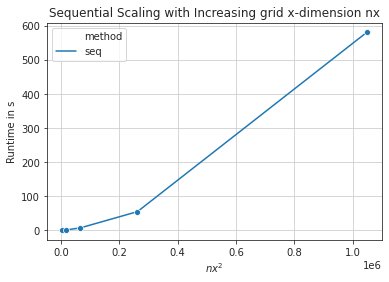

In [36]:
data['nx^2']=data['nx'] * data['nx']
dat=data[data['method'] == 'seq']

# Create main plot
ax1 = sns.lineplot(data=dat, x='nx^2', y='time', hue='method', marker='o')

# Add linear speedup line + seq time hline
# ax1.plot(linSU['x'], linSU['time'], c='c', ls=':')
# plt.axhline(y=time_serial, color='r', linestyle=':')

# Set plot properties
ax1.set(yscale="linear", ylabel='Runtime in s', xlabel='$nx^2$', title='Sequential Scaling with Increasing grid x-dimension nx')

plt.grid(True, 'major')
plt.grid(True, 'minor', color='0.85', linestyle='-', linewidth=0.5)
plt.savefig("seq-runtime.pdf", bbox_inches='tight')

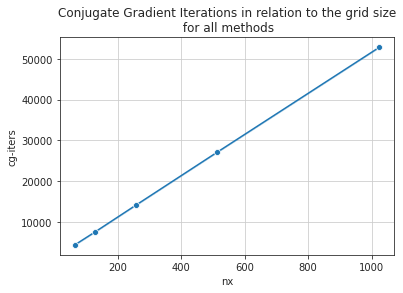

In [77]:
plt.clf()
ax1 = sns.lineplot(data=data, x='nx', y='cg-iters',  marker='o')
ax1.set(yscale="linear", title='Conjugate Gradient Iterations in relation to the grid size\n for all methods')

plt.grid(True, 'major')
plt.grid(True, 'minor', color='0.85', linestyle='-', linewidth=0.5)
plt.savefig("cg-iters.pdf", bbox_inches='tight')

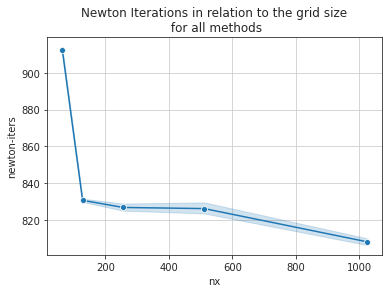

In [78]:
plt.clf()
ax1 = sns.lineplot(data=data, x='nx', y='newton-iters',  marker='o')
ax1.set(yscale="linear", title='Newton Iterations in relation to the grid size\n for all methods')

plt.grid(True, 'major')
plt.grid(True, 'minor', color='0.85', linestyle='-', linewidth=0.5)
plt.savefig("newton-iters.pdf", bbox_inches='tight')

In [37]:
linSU = []
for i in data['cores'].unique():
    linSU.append([i,i,time_serial / i])
linSU = pd.DataFrame(linSU, columns=['x', 'speedup', 'time'])
linSU

x  speedup        time
0   1        1  128.447684
1   4        4   32.111921
2   8        8   16.055960
3  12       12   10.703974
4  16       16    8.027980
5  20       20    6.422384
6  24       24    5.351987

# Runtime

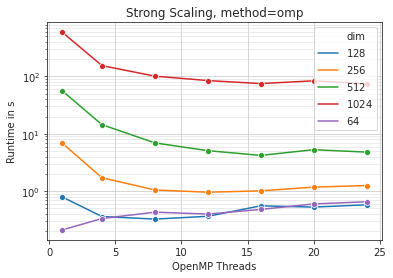

In [38]:
method='omp'
data1=data[data['method'] == method]
#print(data1.head())

# Create main plot
ax1 = sns.lineplot(data=data1, x='cores', y='time', hue='dim', marker='o')

# Add linear speedup line + seq time hline
# ax1.plot(linSU['x'], linSU['time'], c='c', ls=':')
# plt.axhline(y=time_serial, color='r', linestyle=':')

# Set plot properties
ax1.set(yscale="log", ylabel='Runtime in s', xlabel='OpenMP Threads', title='Strong Scaling, method=%s' % method)

plt.grid(True, 'major')
plt.grid(True, 'minor', color='0.85', linestyle='-', linewidth=0.5)
plt.savefig("runtime.pdf", bbox_inches='tight')

# Weak Scaling

In [39]:
# dim=256
# data2=data[data['nx'] == dim]
avgTime = data.groupby(['method','cores','nx'], as_index=True)['time'].mean()
print(avgTime)
avgTime = avgTime.to_frame()
avgTime.reset_index(level='cores', inplace=True)
# avgTime

method  cores  nx  
omp     1      64        0.210928
               128       0.791223
               256       6.875753
               512      56.256190
               1024    590.038800
        4      64        0.333083
               128       0.361183
               256       1.714382
               512      14.432740
               1024    154.512800
        8      64        0.430035
               128       0.325856
               256       1.048658
               512       6.944664
               1024    101.226600
        12     64        0.398576
               128       0.364355
               256       0.958692
               512       5.080950
               1024     84.776450
        16     64        0.480548
               128       0.555015
               256       1.012137
               512       4.201111
               1024     75.129510
        20     64        0.598332
               128       0.527282
               256       1.175630
               512       5.2

In [53]:
linSU = avgTime.query('cores == 1')
tmp = linSU
for i in np.delete(data['cores'].unique(),0):
#     print(tmp * [i, 1/i])
#     print(tmp)
    linSU = linSU.append(tmp * [i, 1/i])
linSU.reset_index(inplace=True)
linSU.query('nx == 128')


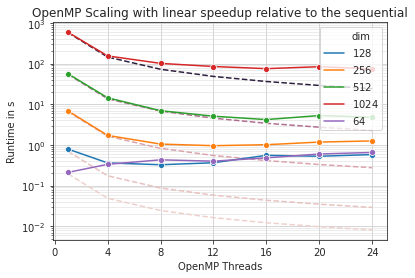

In [60]:
plt.clf()

# Add linear speedup line + seq time hline
ax2 = sns.lineplot(data=linSU[linSU['method'] == 'seq'], x='cores', y='time', hue='nx', 
                   legend=None)
# Add const work-per-core
# ax3 = sns.lineplot(data=data[data['method'] == 'omp'], x='cores', y='time', hue='work-per-core',
#                    marker='x', color='b', legend=None)

for i in ax2.lines:   #Fix dashes
    i.set_linestyle("--")

# Add main plot (after so it's not dashed)
ax1 = sns.lineplot(data=data[data['method'] == 'omp'], x='cores', y='time', hue='dim', marker='o', palette='tab10')


# Set plot properties
ax1.set(yscale="log", ylabel='Runtime in s', xlabel='OpenMP Threads', 
        title='OpenMP Scaling with linear speedup relative to the sequential')

plt.xticks(np.arange(0, 28, 4))
plt.grid(True, 'major')
plt.grid(True, 'minor', color='0.85', linestyle='-', linewidth=0.5)
plt.savefig("weak-scaling-su.pdf", bbox_inches='tight')

In [57]:
# workloads = data[data.count() > 1]
workloads = data['work-per-core'].value_counts()
workloads = workloads.to_frame()
workloads = workloads[workloads['work-per-core'] > 1]
workloads = workloads.index

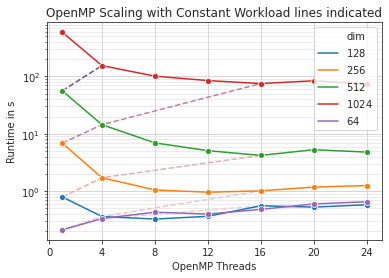

In [58]:
plt.clf()

# Add const
ax3 = sns.lineplot(data=data[(data['method'] == 'omp') & (data['work-per-core'].isin(workloads.array))], 
                   x='cores', y='time', hue='work-per-core', legend=None, marker='x')

for i in ax3.lines:   #Fix dashes
    i.set_linestyle("--")

# Add main plot (after so it's not dashed)
ax1 = sns.lineplot(data=data[data['method'] == 'omp'], x='cores', y='time', hue='dim', marker='o')


# Set plot properties
ax1.set(yscale="log", ylabel='Runtime in s', xlabel='OpenMP Threads', 
        title='OpenMP Scaling with Constant Workload lines indicated')

plt.xticks(np.arange(0, 28, 4))
plt.grid(True, 'major')
plt.grid(True, 'minor', color='0.85', linestyle='-', linewidth=0.5)
plt.savefig("weak-scaling-no-su.pdf", bbox_inches='tight')